In [2]:
import numpy as np
import math

def sample_circle(N, N_noise):
    angles = [2*math.pi*np.random.rand() for i in range(N)]
    X = np.array([[math.cos(angles[i]), math.sin(angles[i])] if i < N else [2*np.random.rand()-1, 2*np.random.rand()-1] for i in range(N + N_noise)])
    return X

In [ ]:
X = sample_circle(200, 10)

In [17]:
np.save("noisy_circle_10outliers.npy", X)

DVR

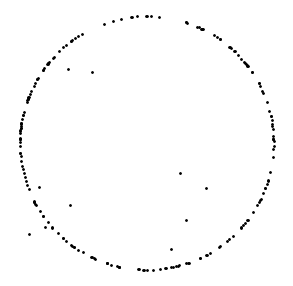

In [3]:
import matplotlib.pyplot as plt

X = np.load('noisy_circle_10outliers.npy')
plt.rcParams['figure.figsize'] = (5, 5)
plt.axis('equal')
plt.axis('off')
plt.scatter(X[:, 0], X[:, 1], s = 3, color = 'k')

Set k =  10


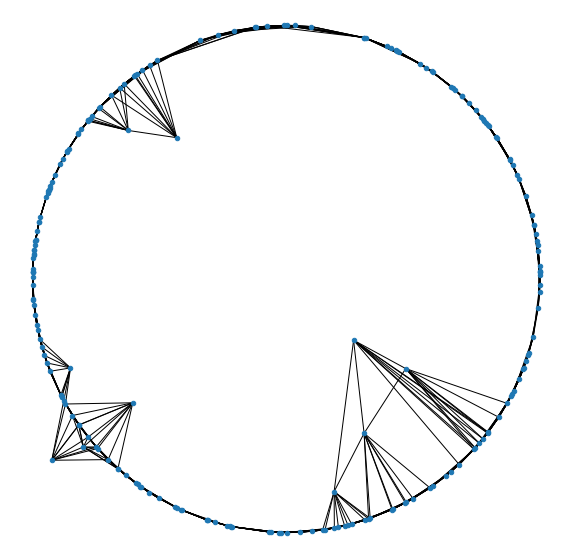

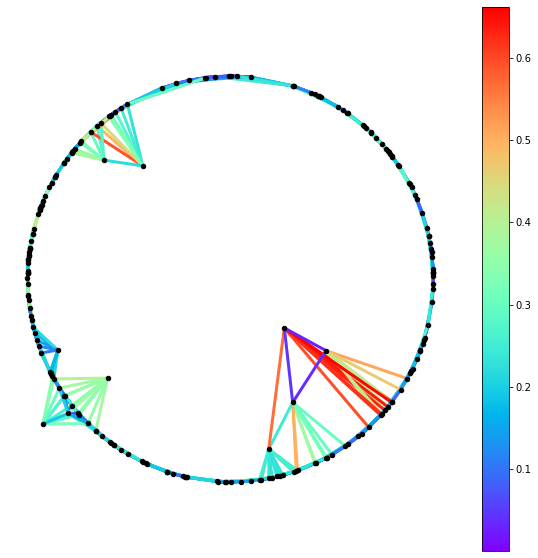

In [8]:
import DVR

geoest = DVR.Geodist_estimator(X, 1)
geoest.plot_Gknn_unweighted(node_size = 20)
geoest.plot_Gknn_weighted(node_size = 20)
geo_dist = geoest.distance_matrix()

Text(0.5, 1.0, '')

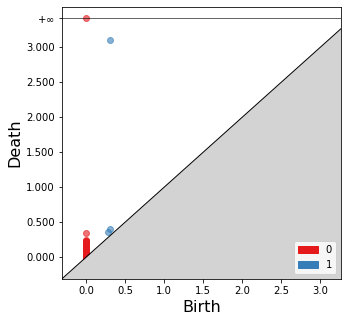

In [9]:
import gudhi as gd

plt.rcParams['figure.figsize'] = (5, 5)
geo_cpx = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
geo_ph = geo_cpx.persistence()
gd.plot_persistence_diagram(persistence = geo_ph, legend = True)
plt.title("")

In [10]:
print(geo_ph[0])
print(geo_ph[0][1][1] - geo_ph[0][1][0])

(1, (0.29873070767176607, 3.107286275913752))
2.808555568241986


DVR: triweight kernel

Set k =  10


Text(0.5, 1.0, '')

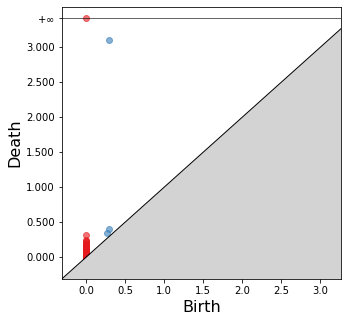

In [5]:
import DVR
import gudhi as gd

triweight = DVR.DVR(1, points = X, kernel = DVR.f_estimator.triweight, max_dimension = 2)
triweight_ph = triweight.persistence()
gd.plot_persistence_diagram(persistence = triweight_ph)
plt.title("")

In [6]:
print(triweight_ph[0])
print(triweight_ph[0][1][1]- triweight_ph[0][1][0])

(1, (0.2942040952682444, 3.109468297697296))
2.8152642024290513


DVR: Epanechnikov kernel

Set k =  10


usetex mode requires ghostscript.


Text(0.5, 1.0, '')

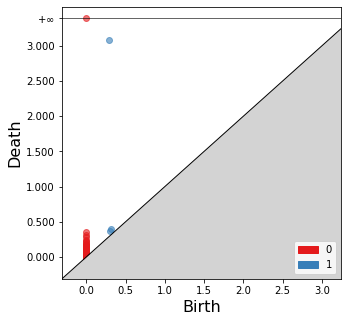

In [4]:
import DVR
import gudhi as gd

geo_cpx_ep = DVR.DVR(1, points = X, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

In [5]:
print(geo_ph_ep[0])
print(geo_ph_ep[0][1][1] - geo_ph_ep[0][1][0])

(1, (0.29259555638470625, 3.086318931573039))
2.793723375188333


Vietoris Rips

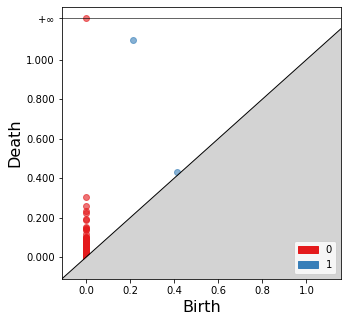

In [10]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("")
plt.show()

In [11]:
print(vr_ph[0])

(1, (0.2117139591535535, 1.1016636496066536))


Density weighted

In [44]:
import DVR
import imp
imp.reload(DVR)
import gudhi as gd

def run_analysis(X):
    f_est = DVR.f_estimator(1, points = X)
    density = [f_est(x) for x in X]
    radii = np.array([1/(DVR.alpha(1, X.shape[0])*density[i]) for i in range(X.shape[0])])
    weighted_D = DVR.DVR_distance_matrix(d = 1, points = X, density = density, weighted = True)
    
    lim = 1.85
    def plot_balls(t):
        fig, ax = plt.subplots()
        ax.axis('equal')
        ax.set(xlim=(-1.4, 1.85), ylim=(-1.85, 1.4))
        M = ax.transData.get_matrix()
        xscale = M[0,0]
        plt.scatter(X[:, 0], X[:, 1], s = (t*xscale*radii*2)**2, alpha = .1)
    ts = [.05, .1, .15]
    for t in ts:
        print(f"t = {t}")
        tname = {}
        tname = str(t).split(".")[1]
        plot_balls(t)
        DVR.plot_1skeleton(X, weighted_D, t)
        plt.savefig(f'figures/noisy_circle/1skeleton_10outliers_weighted_t{tname}.png', bbox_inches = 'tight')
        plt.show()

    weighted = gd.RipsComplex(distance_matrix = weighted_D).create_simplex_tree(max_dimension = 2)
    weighted_ph = weighted.persistence()
    gd.plot_persistence_diagram(persistence = weighted_ph, legend = True)
    plt.title(f"Weighted DVR: Circle with Outliers")
    plt.show()

t = 0.05


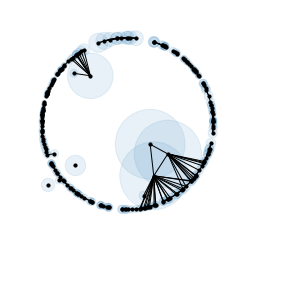

t = 0.1


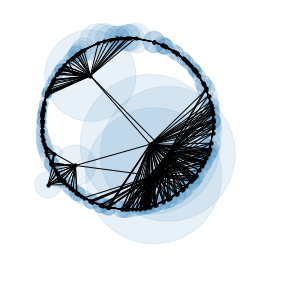

t = 0.15


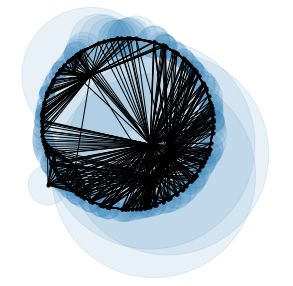

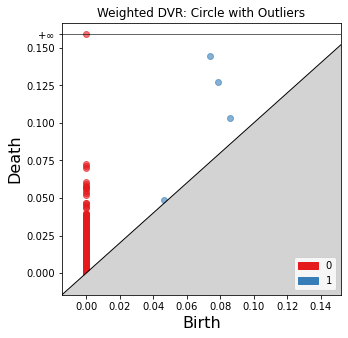

In [45]:
run_analysis(X)

Test knn filtration

In [3]:
import numpy as np
X = np.load("noisy_circle_10outliers.npy")

In [9]:
knnD = DVR.knn_distance(X)

<class 'numpy.ndarray'>
(210, 210)
[  0.   1.  56. 162. 171. 136.  72. 132.  58. 139. 113. 206. 179.  98.
  97. 115.  29. 141.  66.  55. 183.  75. 144. 107. 160. 186.  89.  94.
  16. 205.   4.  49. 176.  54. 196.  74. 103. 207. 121. 105.  45. 149.
 112.  78.  48.  14.  30. 195. 143.   8. 199. 187.  36.  52. 175.  24.
 156. 201. 185. 111.  61. 158. 174. 198. 157.   5. 137.  99.  64.  84.
 194. 152.  35. 181.  42.  95. 146.  27. 204. 165.  76.  69. 197. 178.
 122. 177.   3. 124.  93. 202. 166.  19.  22.  28. 172. 147. 126. 167.
 203. 154. 119. 150.  40. 116.  86. 131. 100.  20.  81. 129.  37. 163.
 153.  41. 114. 164. 106.  47. 193.  25.   6. 138.  57.  34.  59. 169.
  92. 188.  91.  73.  26.  38.  13. 142.  83.  80. 133. 127. 184.  15.
 104.  68. 182. 109. 108. 145.  46.  44. 125.  18.   7.   2. 102. 155.
  32.   9.  21.  85. 170. 191.  53.  11.  39. 159. 190. 110. 118.  82.
  67. 120. 148.  70.  62.  17.  51. 200. 128.  88.  43.  31.  12.  96.
  10.  33. 168. 117. 189. 151.  87.  50. 1

usetex mode requires ghostscript.


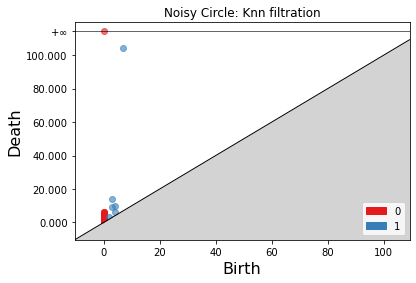

In [10]:
import gudhi as gd
import matplotlib.pyplot as plt

knn_cpx = gd.RipsComplex(distance_matrix = knnD).create_simplex_tree(max_dimension = 2)
knn_ph = knn_cpx.persistence()
gd.plot_persistence_diagram(persistence = knn_ph, legend = True)
plt.title("Noisy Circle: Knn filtration")
plt.show()

t = 0


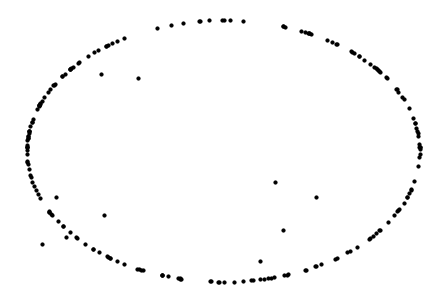

t = 10


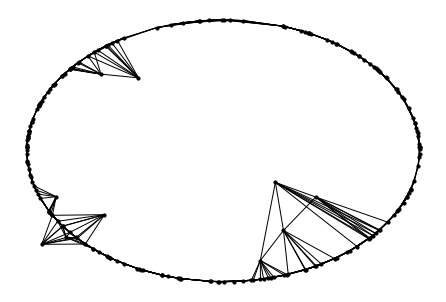

t = 20


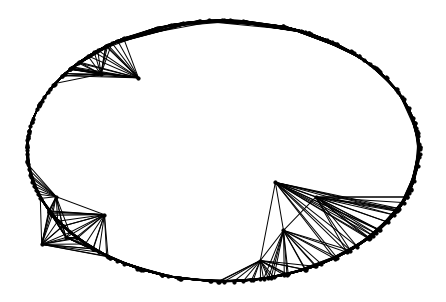

t = 30


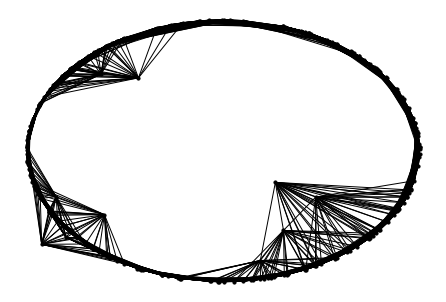

t = 40


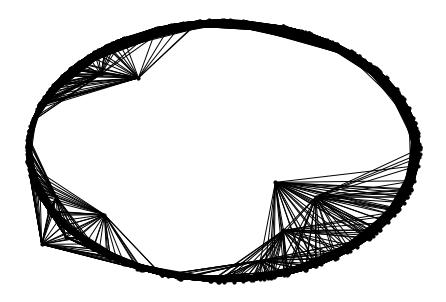

t = 50


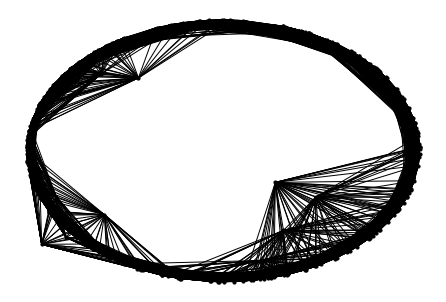

t = 60


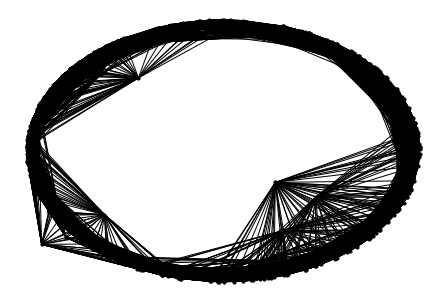

t = 70


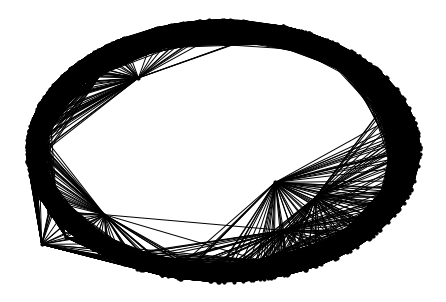

t = 80


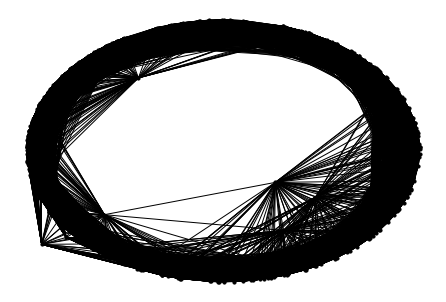

t = 90


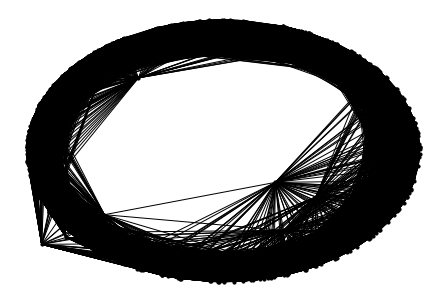

t = 100


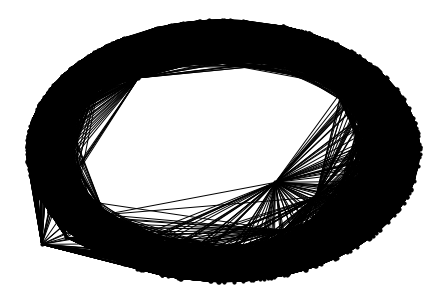

t = 110


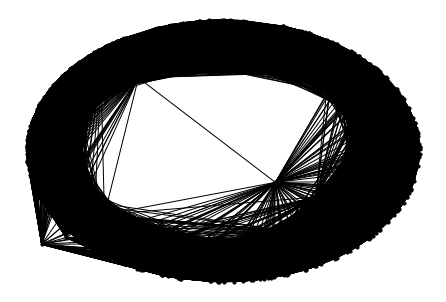

In [12]:
for t in range(0, 111, 10):
    print(f"t = {t}")
    DVR.plot_1skeleton(X, knnD, t)
    plt.show()